(318, 157)


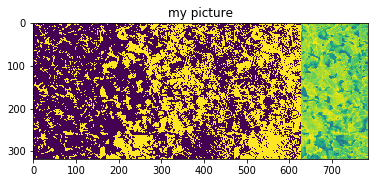

In [137]:
#analysis for images without crop
import cv2 as cv
import sys
from matplotlib import pyplot as plt
import numpy as np 
img = cv.imread(cv.samples.findFile("G:\my Ml projects\image processing\p51.PNG"))
if img is None:
    sys.exit("Could not read the image.")

gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
#cv.imshow("Display window", gray)
#cv.waitKey(0)
dimensions = gray.shape 
print(dimensions)
equ1 = cv.equalizeHist(gray)
clahe = cv.createCLAHE(clipLimit=12.0, tileGridSize=(8,8))
equ = clahe.apply(gray)
#blur = cv.bilateralFilter(equ,5,51,51)
#blur = cv.GaussianBlur(img,(5,5),0)
#ret,th3 = cv.threshold(equ,255,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret,th = cv.threshold(equ,210,255,cv.THRESH_BINARY)   #for cement paste 
ret,th1 = cv.threshold(equ1,100,255,cv.THRESH_BINARY_INV) # for air voids 
ret,th2 = cv.threshold(equ1,0,255,cv.THRESH_BINARY) #whole image
#adding th and th1 will give image for aggregate 
dst1 = cv.addWeighted(th,1,th1,1,0)
ret,dst = cv.threshold(dst1,100,255,cv.THRESH_BINARY_INV) 
res = np.hstack((th,th1,dst,dst1,gray))
cv.imshow("Display window", res) 
cv.waitKey(0)
plt.imshow(res) 
plt.title('my picture')
plt.show()
#hist = cv.calcHist([th2],[0],None,[256],[0,256])
#plt.hist(th2.ravel(),256,[0,256]); plt.show()
#cv.imwrite("airvoids.PNG",th3)  


In [119]:
edges = cv.Canny(th1,150,255)
edges1 = cv.Canny(th,150,255)
edges2 = cv.Canny(dst,150,255)
final = np.hstack((edges,th1))
final1 = np.hstack((edges1,th))
final2 = np.hstack((edges2,dst))
cv.imshow("air voids", final) 
cv.imshow("cement paste", final1) 
cv.imshow("agregate", final2) 
cv.waitKey(0)


-1

In [125]:
n_white_pix = np.sum(th1==255)
print('Number of white pixels:', n_white_pix)


Number of white pixels: 40812


(318, 157)


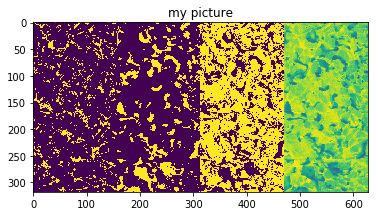

-1

In [171]:
#images with cropped surface
import cv2 as cv
import sys
from matplotlib import pyplot as plt
import numpy as np 
img = cv.imread(cv.samples.findFile("G:\my Ml projects\image processing\p51.PNG"))
if img is None:
    sys.exit("Could not read the image.")

gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
#cv.imshow("Display window", gray)
#cv.waitKey(0)
dimensions = gray.shape 
print(dimensions)
equ1 = cv.equalizeHist(gray)
clahe = cv.createCLAHE(clipLimit=12.0, tileGridSize=(8,8))
equ = clahe.apply(gray)
#blur = cv.bilateralFilter(equ,5,51,51)
#blur = cv.GaussianBlur(img,(5,5),0)
#ret,th3 = cv.threshold(equ,255,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret,th = cv.threshold(equ,220,255,cv.THRESH_BINARY)   #for cement paste 
ret,th1 = cv.threshold(equ1,50,255,cv.THRESH_BINARY_INV) # for air voids 
ret,th2 = cv.threshold(equ1,0,255,cv.THRESH_BINARY) #whole image
#adding th and th1 will give image for aggregate 
dst1 = cv.addWeighted(th,1,th1,1,0)
ret,dst = cv.threshold(dst1,100,255,cv.THRESH_BINARY_INV) 
res = np.hstack((th,th1,dst,gray))
cv.imshow("Display window", res) 
cv.waitKey(0)
plt.imshow(res) 
plt.title('my picture')
plt.show()
#hist = cv.calcHist([th2],[0],None,[256],[0,256])
#plt.hist(th2.ravel(),256,[0,256]); plt.show()
#cv.imwrite("airvoids.PNG",th3)  
edges = cv.Canny(th1,150,255)
edges1 = cv.Canny(th,150,255)
edges2 = cv.Canny(dst,150,255)
final = np.hstack((edges,th1))
final1 = np.hstack((edges1,th))
final2 = np.hstack((edges2,dst))
cv.imshow("air voids", final) 
cv.imshow("cement paste", final1) 
cv.imshow("agregate", final2) 
cv.waitKey(0)

In [166]:
n_white_pix_w = np.sum(th2==255)  #whole area
print('Number of white pixels whole:', n_white_pix_w)
n_white_pix_v = np.sum(th1==255)   #voids area
print('Number of white pixels voids:', n_white_pix_v)
n_white_pix_c = np.sum(th==255)     #cement area
print('Number of white pixels cement:', n_white_pix_c)
n_white_pix_a = np.sum(dst==255)  #aggregate area
print('Number of white pixels aggregate:', n_white_pix_a)

Number of white pixels whole: 72219
Number of white pixels voids: 14035
Number of white pixels cement: 9719
Number of white pixels aggregate: 48608


# Calculating Area of each part

In [167]:
speciman_area = 100 * 200 
number_of_total_pixels = dimensions[0] * dimensions[1]
pixel_per_mm_square = speciman_area / number_of_total_pixels 
area_of_v = n_white_pix_v * pixel_per_mm_square
area_of_c = n_white_pix_c * pixel_per_mm_square
area_of_a = n_white_pix_a * pixel_per_mm_square 
print("area of voids:",area_of_v)
print("area of cement:",area_of_c)
print("area of aggregate:",area_of_a)
area_whole = area_of_v + area_of_c + area_of_a
print ("whole area:",area_whole)

area of voids: 3879.1078190210333
area of cement: 2686.216522484177
area of aggregate: 13434.67565849479
whole area: 20000.0
